# [**Ellipses de Confiance du modèle de mélange gaussien**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/2_1_mixture/plot_gmm.ipynb)<br/>([_Gaussian Mixture Model Ellipsoids_](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html))

Tracé des ellipses de confiance d'un mélange de deux gaussiennes obtenues avec l'espérance-maximisation (classe [**`GaussianMixture`**](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)) et l'inférence variationnelle (classe [**`BayesianGaussianMixture`**](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html)) avec une priorité de processus de Dirichlet.

Les deux modèles ont accès à cinq composantes avec lesquelles ajuster les données. Notez que le modèle d'espérance-maximisation utilisera nécessairement les cinq composantes, tandis que le modèle d'inférence variationnelle n'utilisera effectivement que celles qui sont nécessaires pour un bon ajustement. Ici, nous pouvons voir que le modèle d'espérance-maximisation divise certaines composantes de manière arbitraire, car il essaie d'ajuster trop de composantes, tandis que le modèle de processus de Dirichlet adapte automatiquement son nombre d'états.

Cet exemple ne le montre pas, car nous sommes dans un espace de faible dimension, mais un autre avantage du modèle de processus de Dirichlet est qu'il peut ajuster efficacement des matrices de covariance complètes même lorsqu'il y a moins d'exemples par grappe que de dimensions dans les données, en raison des propriétés de régularisation de l'algorithme d'inférence.

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


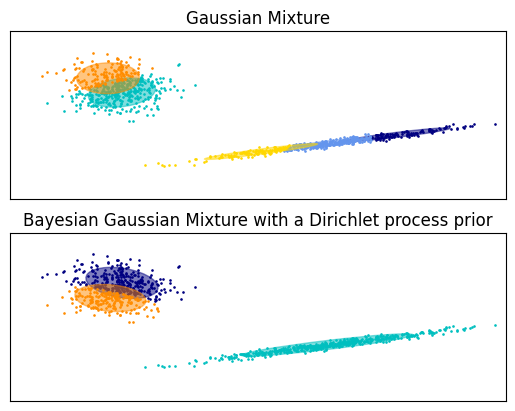

In [1]:
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)

plt.show()